In [1]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_excel('map55.xlsx')
df

,state,year,month,actual,Viewing Date,Elevation
0,AK,2012,2012/3/23,3/23,83,580
1,AK,2013,2013/4/11,4/11,101,580
2,AK,2017,2017/3/22,3/22,81,580
3,AK,2018,2018/3/11,3/11,70,580
4,AK,2019,2019/3/16,3/16,75,580
...,...,...,...,...,...,...
503,WY,2013,2013/4/15,4/15,105,2044
504,WY,2015,2015/4/09,4/09,99,2044
505,WY,2016,2016/3/28,3/28,88,2044
506,WY,2018,2018/4/02,4/02,92,2044


In [3]:
a=pd.read_excel('uscities.xlsx')
a=a[['state_id','lat']]
a=a.drop_duplicates()
a

,state_id,lat
0,NY,40.6943
1,CA,34.1139
2,IL,41.8373
3,FL,25.7839
4,TX,32.7936
...,...,...
28332,AK,58.9051
28333,NE,42.9461
28334,OK,36.1334
28336,OK,35.9113


In [4]:
df_1=df[df['year']==2021]
df_1=df_1.reset_index(drop=True)

In [5]:
df2=pd.DataFrame(a.groupby('state_id')['lat'].mean())
len(df2)

52

In [6]:
b=pd.merge(df_1,df2,left_on='state',right_on='state_id',how='inner')
b.head(5)

,state,year,month,actual,Viewing Date,Elevation,lat
0,AR,2021,2021/3/20,3/20,79,198,35.073337
1,AZ,2021,2021/3/20,3/20,79,1251,33.876504
2,CA,2021,2021/3/14,3/14,73,885,36.904392
3,CO,2021,2021/3/06,3/06,65,2074,39.180920
4,CT,2021,2021/3/30,3/30,89,153,41.564631


In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [9]:
model=linear_model.LinearRegression()
x=np.array(b['Viewing Date']).reshape(-1, 1)
y=np.array(b['lat']).reshape(-1, 1)
model.fit(y,x)
display(model.intercept_)
display(model.coef_)

array([51.90504003])

array([[0.6985303]])

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(y),x)

4.705201390959113

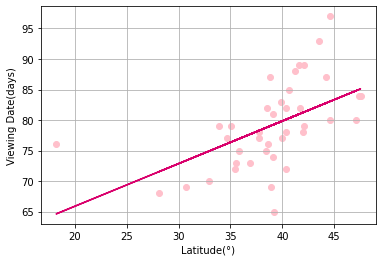

In [11]:
plt.scatter(y,x,c='pink') #画散点图看实际面积和价格的分布情况
plt.plot(y,model.predict(y),color='#D9006C') #画拟合面积与价格的线型图
plt.grid()
plt.xlabel('Latitude(°)')
plt.ylabel('Viewing Date(days)')
plt.savefig('latitude.png',dpi=300)